In [121]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import datetime 
import seaborn as sns
from itertools import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/db/smoking_train.csv')
test = pd.read_csv('/content/drive/MyDrive/db/smoking_test.csv')
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,128.0,76.0,95.0,217.0,199.0,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,55673,F,60.0,150,50.0,75.0,1.0,1.2,1.0,1.0,102.0,60.0,85.0,179.0,53.0,52.0,116.0,12.6,1.0,0.8,26.0,21.0,14.0,Y,0,Y,no
44550,55681,F,45.0,160,50.0,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,no
44551,55683,F,55.0,160,50.0,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,no
44552,55684,M,60.0,165,60.0,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,no


In [33]:
df['oral'].value_counts() #можно опустить этот столбец, тк он заполнен одним значением

Y    44554
Name: oral, dtype: int64

In [123]:
df = df.drop('oral',axis=1)

KeyError: ignored

In [87]:
df_nan = df.loc[:, df.isnull().any()]
df_nan.isnull().sum() / len(df_nan)

age           0.009876
weight(kg)    0.000988
dtype: float64

In [124]:
df = df.dropna() # нет особого смысла заполнять средним и т.п. менее одного процента данных, можно опустить

Переводим все строковые параметры в инты

In [125]:
df.loc[df['gender']=='M','gender'] = 1
df.loc[df['gender']=='F','gender'] = 0
df.loc[df['tartar']=='Y','tartar'] = 1
df.loc[df['tartar']=='N','tartar'] = 0
df.loc[df['smoking']=='yes','smoking'] = 1
df.loc[df['smoking']=='no','smoking'] = 0

df = df.astype({"gender": "Int64"},)
df = df.astype({"smoking" : "Int64"})
df = df.astype({"tartar" : "Int64"})

In [ ]:
df.shape[0]

44071

In [ ]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,2,1,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
1,3,1,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
2,4,0,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
3,5,1,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,128.0,76.0,95.0,217.0,199.0,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,0,1,0
4,6,1,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,1,1,1


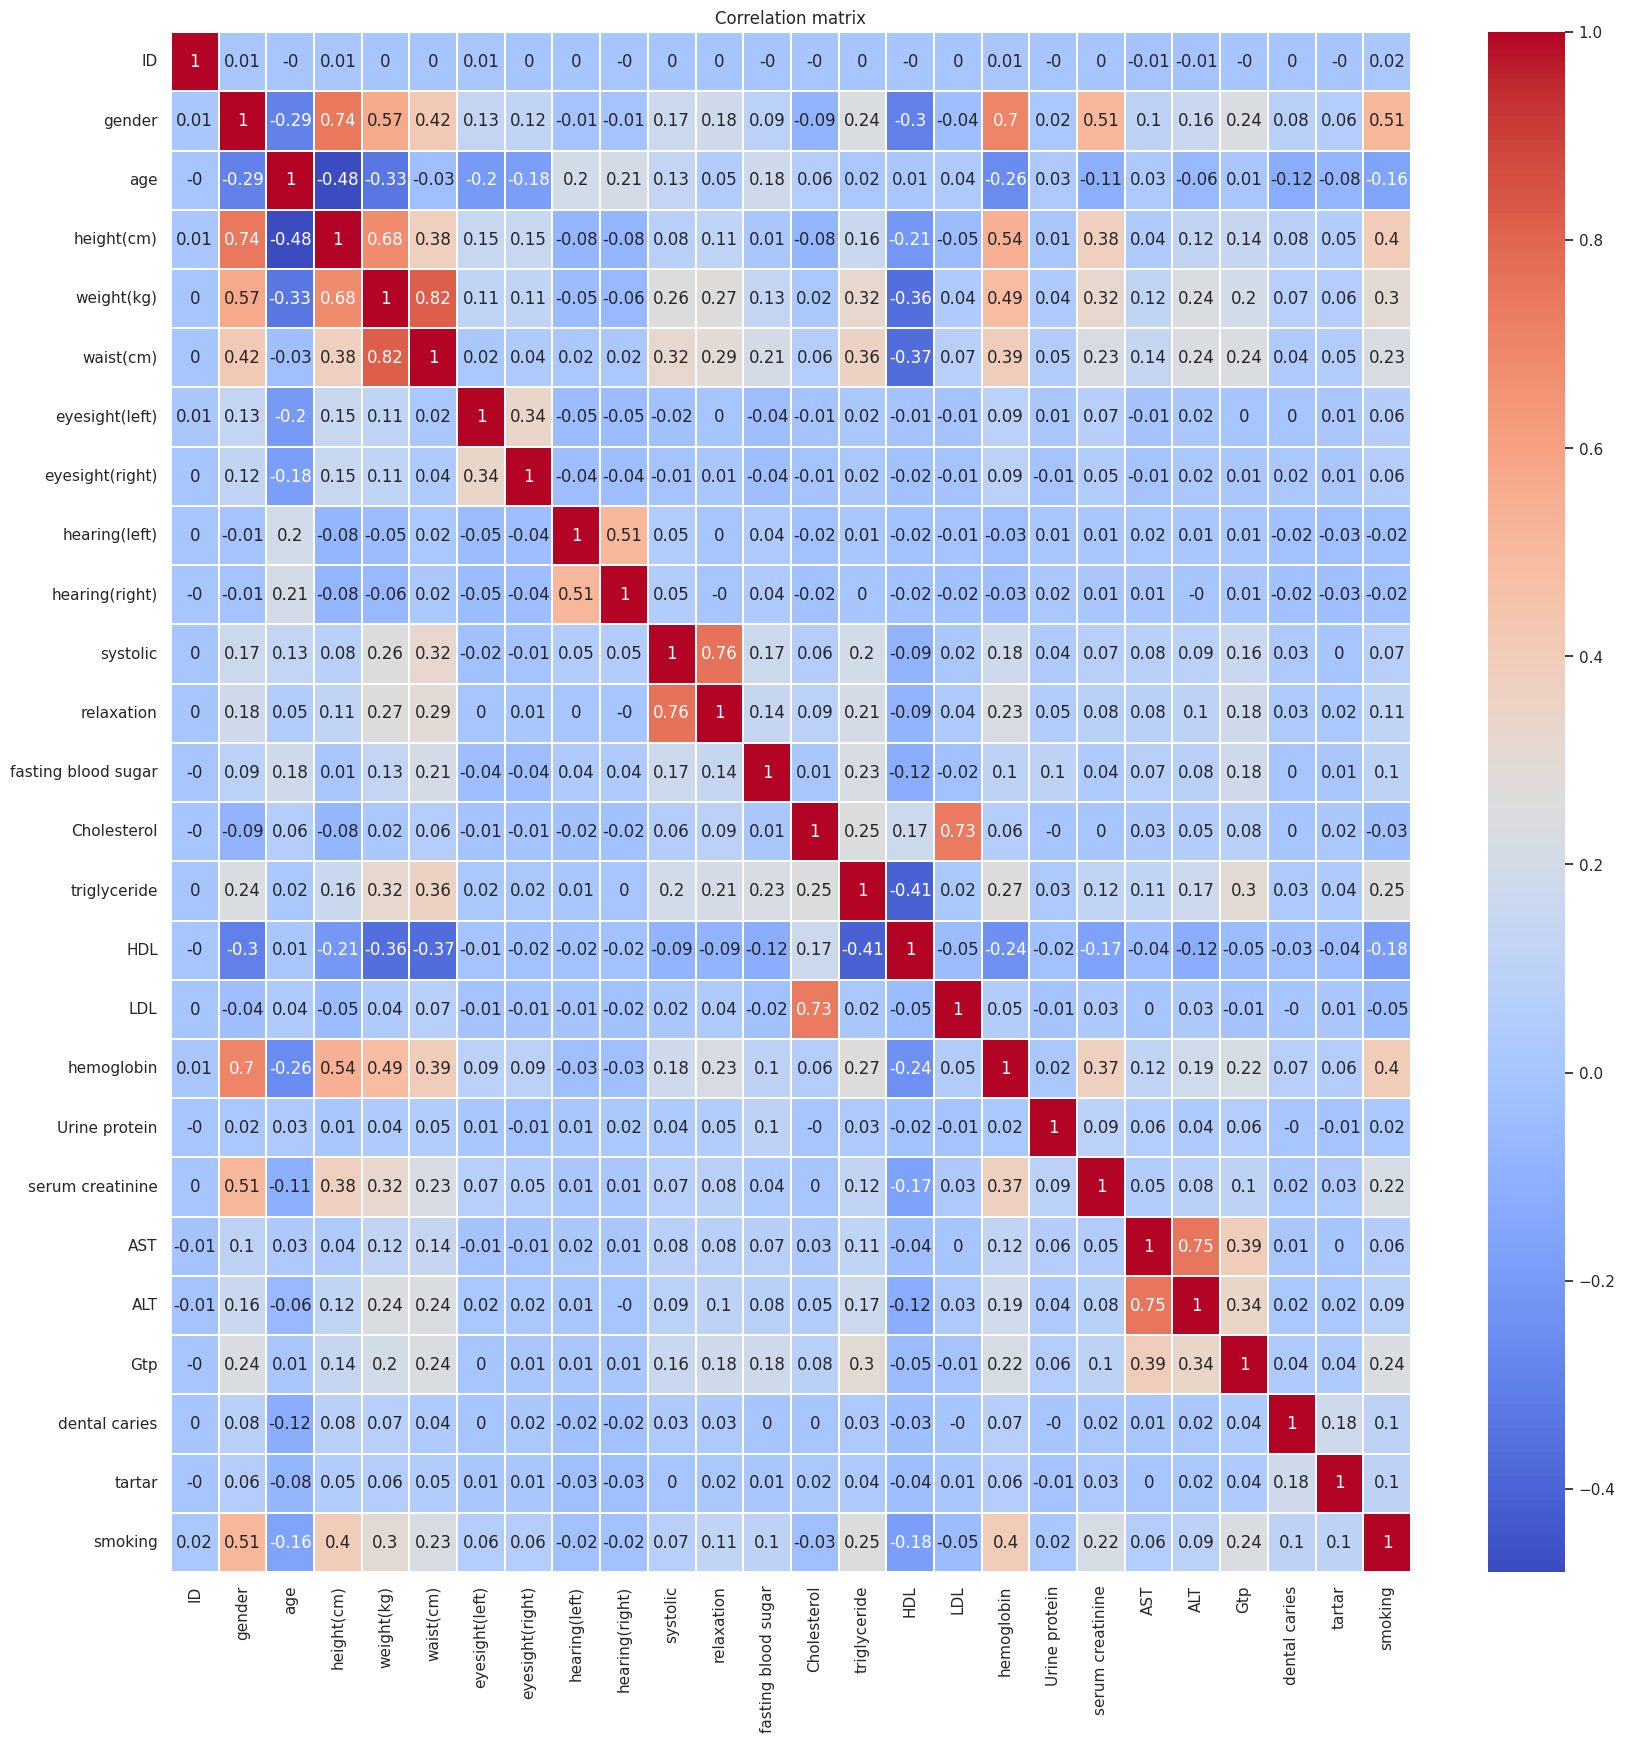

In [62]:
fig, ax = plt.subplots(figsize=(20,20))
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)

sns.heatmap(corr_matrix, annot=True, linewidths=.10, cmap='coolwarm',ax=ax)

plt.title('Correlation matrix')
plt.show()

In [63]:
df['smoking'].value_counts()

0    27848
1    16223
Name: smoking, dtype: Int64

In [ ]:
categories = df.columns.tolist()
len(categories)

26

In [ ]:
categories = categories[1:]
categories

['gender',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'tartar',
 'smoking']

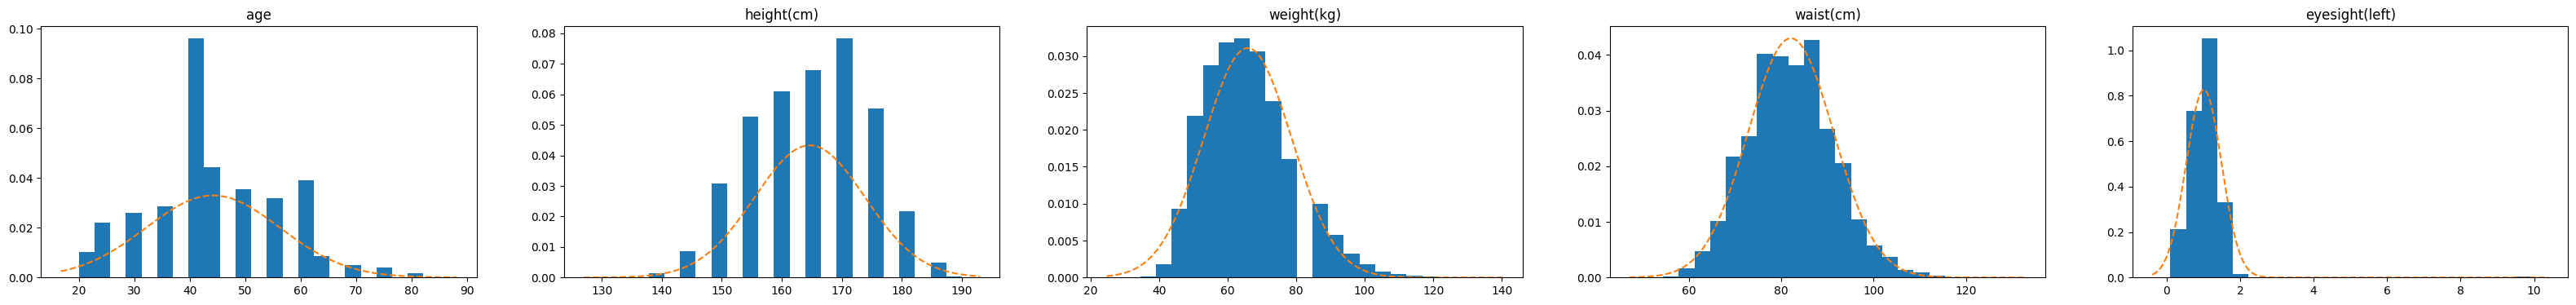

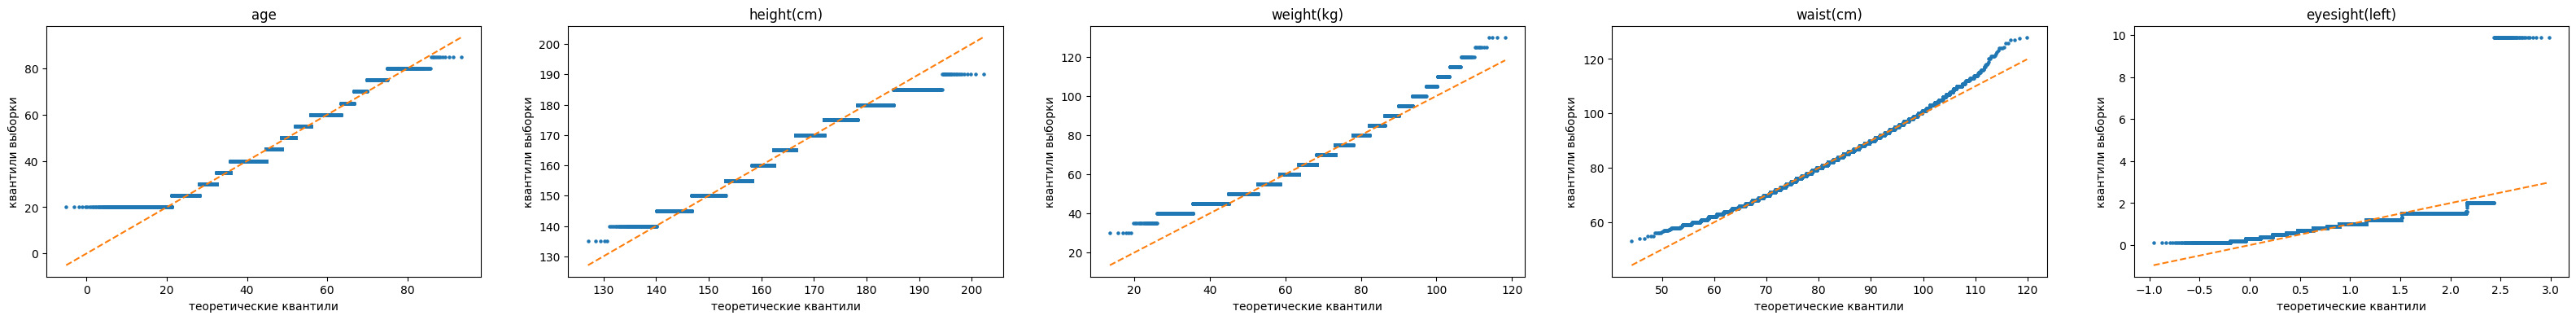

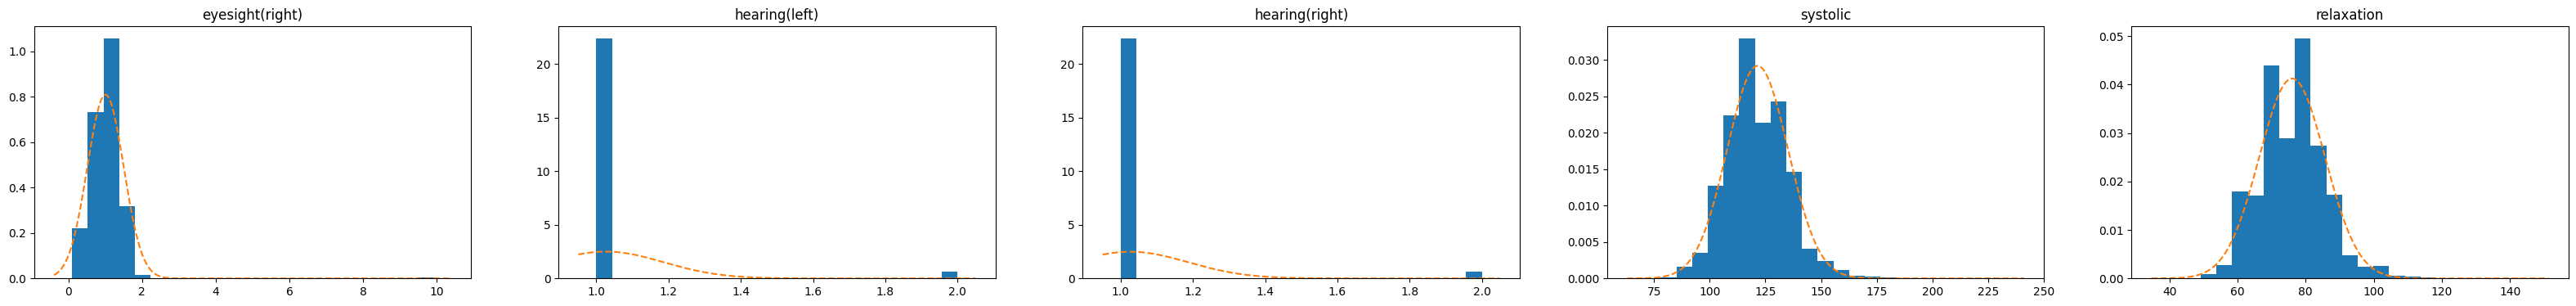

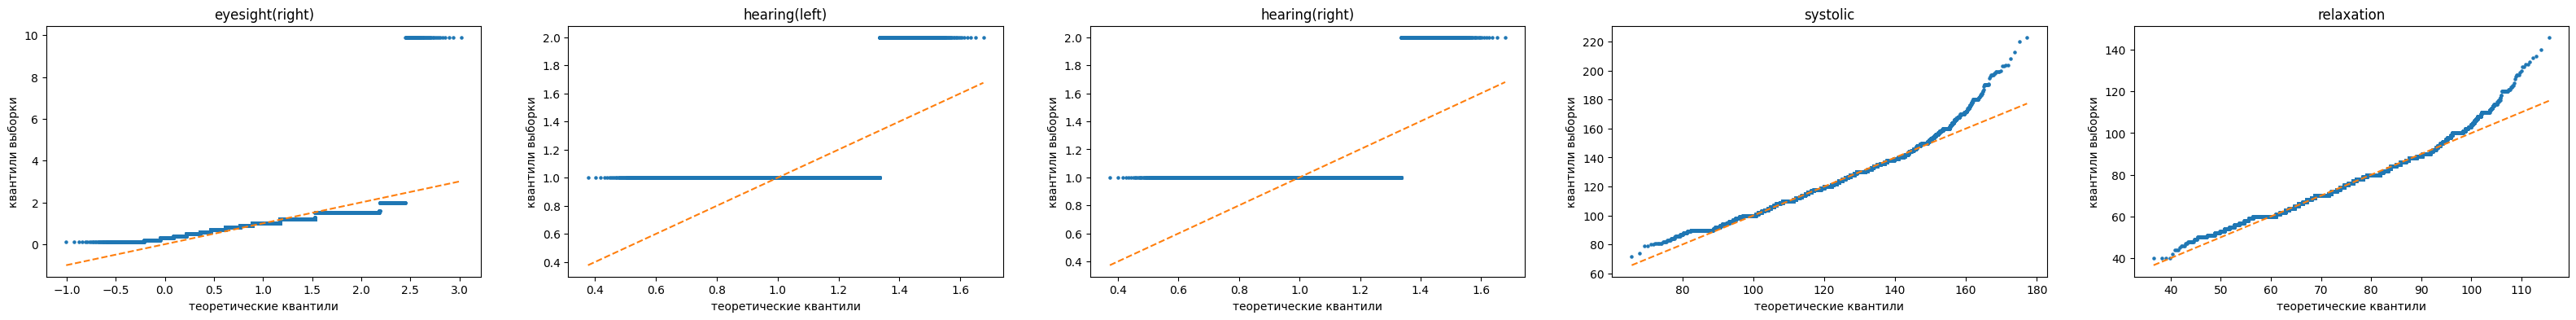

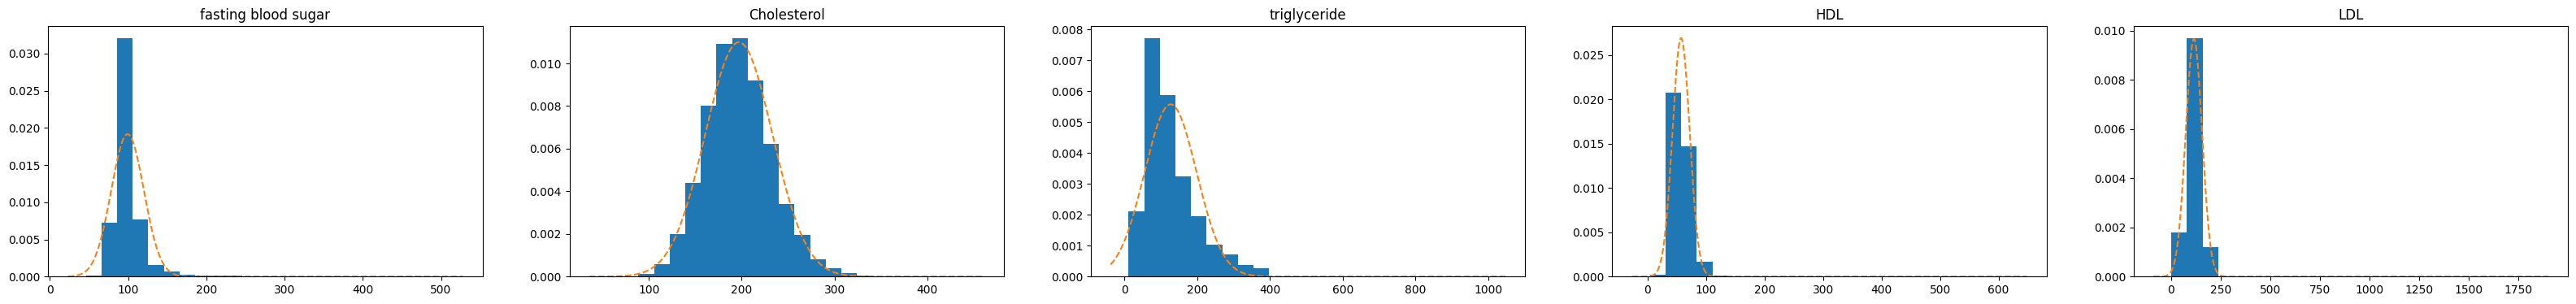

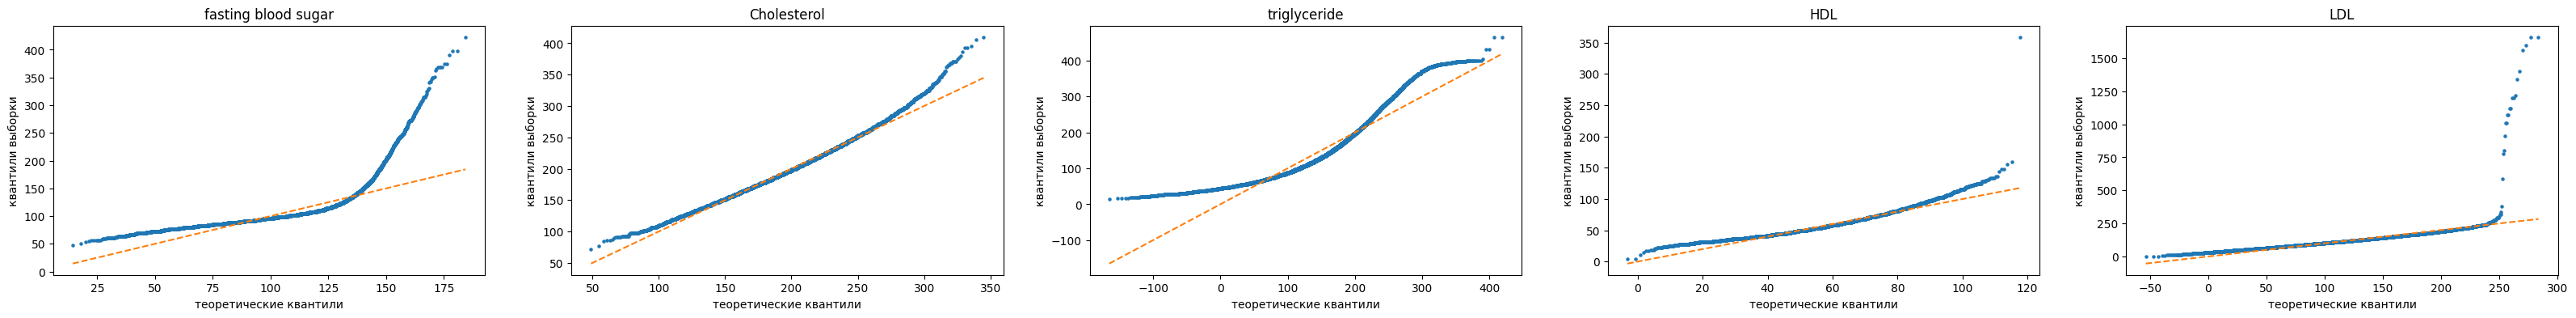

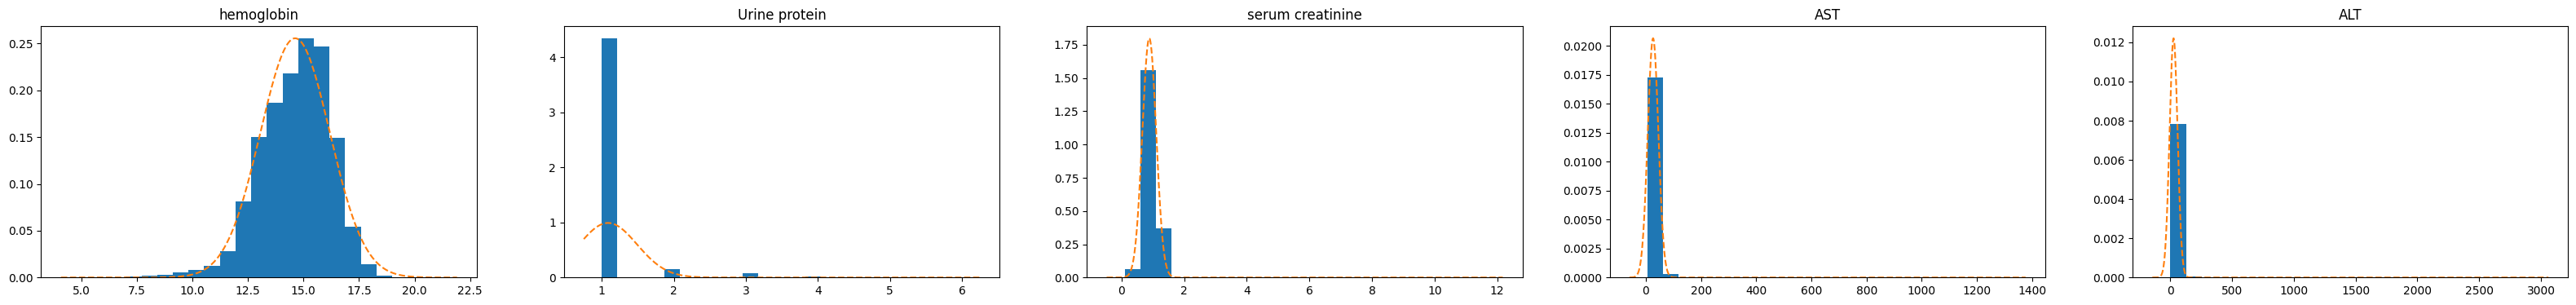

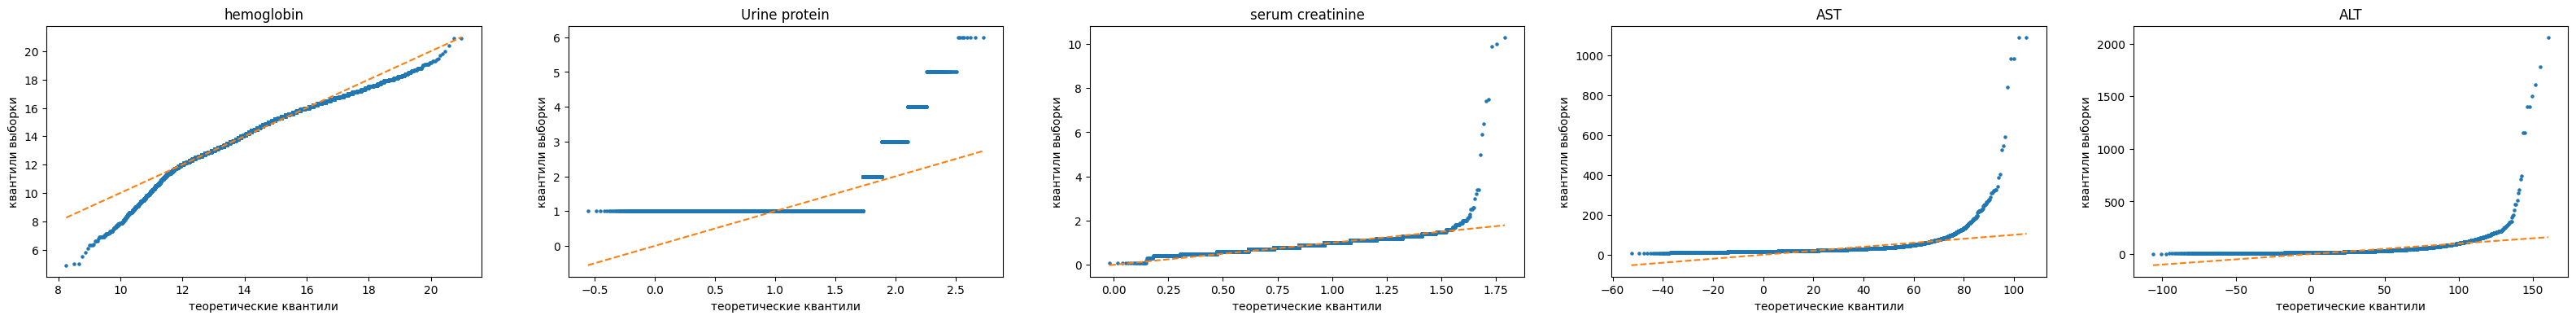

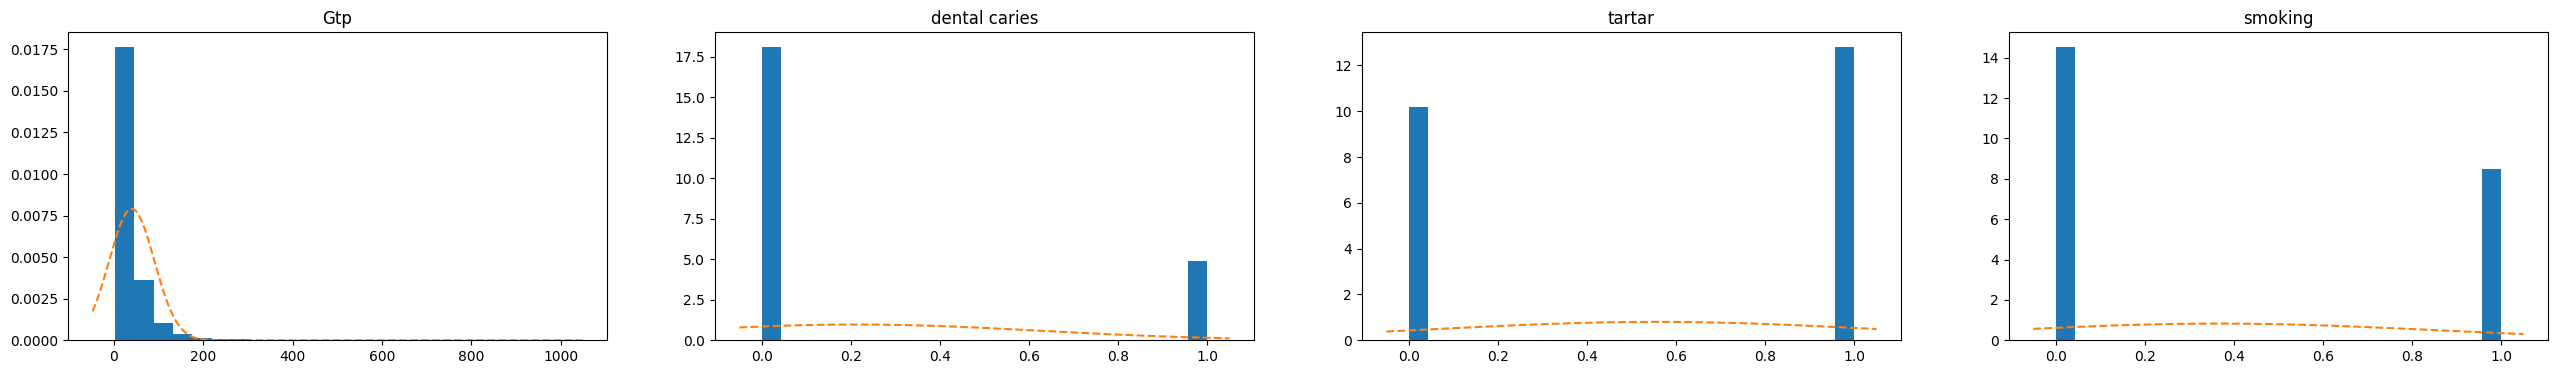

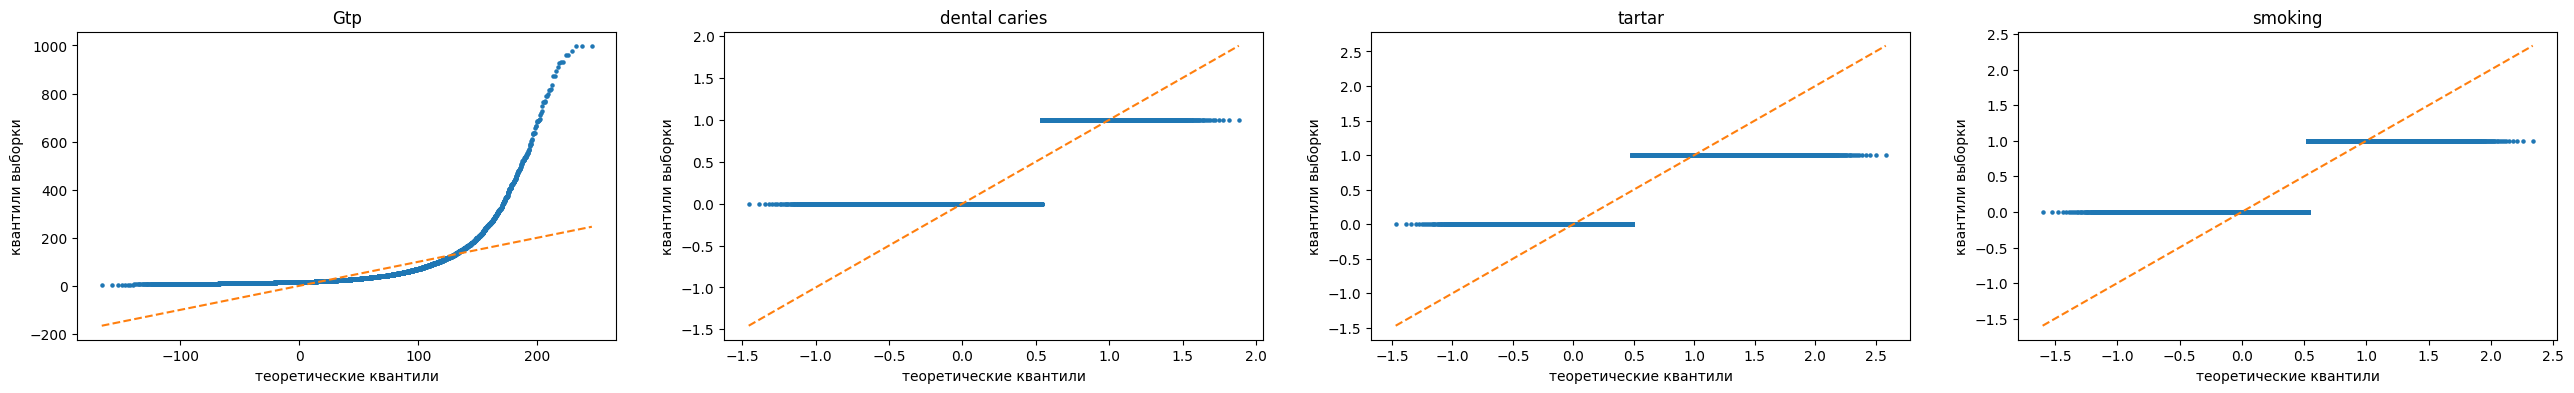

In [ ]:
for j in range(5,26,5):
  categ = categories[j-5:j]

  fig, axes = plt.subplots(ncols=len(categ))
  fig.set_size_inches(8 * len(categ), 4)
  axes = axes.flatten()

  for key, ax in zip(categ, axes):
      ax.hist(df[key], density=True, bins=23)
      
      loc = df[key].mean()
      scale = df[key].std()
      
      x_left, x_right = ax.get_xlim()
      x = np.linspace(x_left, x_right, 10000)
      y = stats.norm.pdf(x, loc=loc, scale=scale)
      
      ax.plot(x, y, linestyle='dashed')
      ax.set_title(key)

  fig, axes = plt.subplots(ncols=len(categ))
  fig.set_size_inches(8 * len(categ), 4)
  axes = axes.flatten()

  for key, ax in zip(categ, axes):
      samples = df[key]
      
      loc = samples.mean()
      scale = samples.std()
      
      interval = np.linspace(0, 1, samples.shape[0])[1:-1]
      x = stats.norm.ppf(interval, loc=loc, scale=scale)
      y = np.quantile(samples, interval)
      
      ax.scatter(x, y, s=5)
      ax.plot(x, x, color='C1', linestyle='dashed')
      
      ax.set_title(key)
      ax.set_xlabel('теоретические квантили')
      ax.set_ylabel('квантили выборки')

Поиск выбросов

<Axes: >

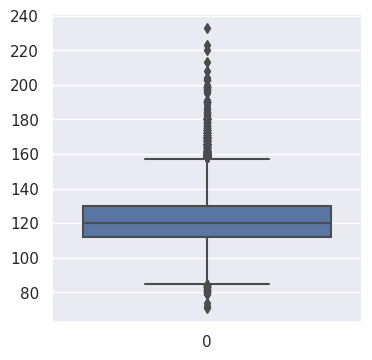

In [92]:
sns.boxplot(df['systolic'])

При давлении > 180 человек находится на грани смерти, следовательно, значения с давлением более 200 можно точно отбросить

In [126]:
indexes_drop = df[df['systolic'] > 200].index
df = df.drop(indexes_drop)

<Axes: >

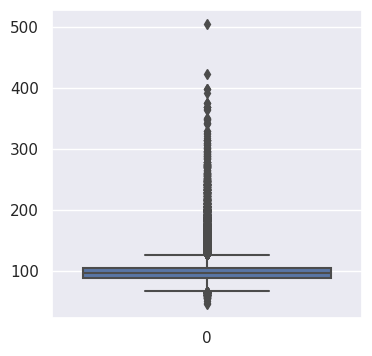

In [94]:
sns.boxplot(df['fasting blood sugar'])

In [127]:
indexes_drop = df[df['fasting blood sugar'] > 400].index
df = df.drop(indexes_drop)

<Axes: >

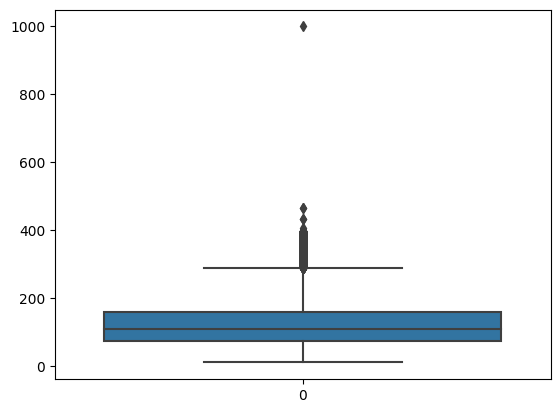

In [ ]:
sns.boxplot(df['triglyceride'])

In [129]:
ind_drop = df[df['triglyceride'] > 600].index
df = df.drop(ind_drop)

Значения 'triglyceride' находятся в норме согласно статьям в интернете

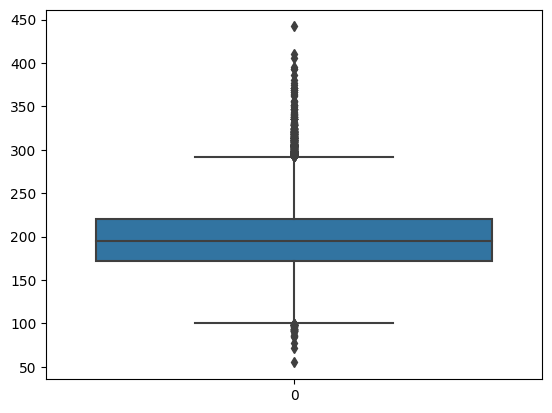

In [ ]:
sns.boxplot(df['Cholesterol'])
sns.set(rc={'figure.figsize':(4, 4)})

Я не нашел в интернете смертельные значения холистерина, поэтому отбросим визуально выделяющиеся выбросы

In [130]:
indexes_drop = df[df['Cholesterol'] > 400].index
df = df.drop(indexes_drop)

<Axes: >

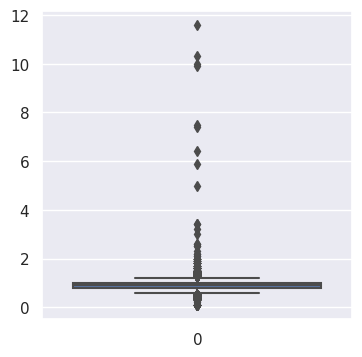

In [ ]:
sns.boxplot(df['serum creatinine'])

In [131]:
indexes_drop = df[df['serum creatinine'] > 2].index
df = df.drop(indexes_drop)

In [ ]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,2,1,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
1,3,1,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
2,4,0,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
3,5,1,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,128.0,76.0,95.0,217.0,199.0,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,0,1,0
4,6,1,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,55673,0,60.0,150,50.0,75.0,1.0,1.2,1.0,1.0,102.0,60.0,85.0,179.0,53.0,52.0,116.0,12.6,1.0,0.8,26.0,21.0,14.0,0,1,0
44550,55681,0,45.0,160,50.0,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
44551,55683,0,55.0,160,50.0,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
44552,55684,1,60.0,165,60.0,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


In [132]:
categories = df.columns.tolist()
for i in categories:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile()
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    left_ej = df[(df[i] < q1-2*iqr) & (df['smoking']==0)].index
    right_ej = df[(df[i] > q3+2*iqr) & (df['smoking'] == 0)].index
    df = df.drop(left_ej)
    df = df.drop(right_ej)

In [133]:
df['smoking'].value_counts()

0    17738
1    16206
Name: smoking, dtype: Int64

In [134]:
np.random.seed(12)
shuffle_index = np.random.permutation(df.shape[0])
y = df['smoking']
y_1 = y.copy()
df = df.drop('ID',axis=1)
df = df.drop('smoking',axis=1)
#x = np.array(df)[shuffle_index]

In [135]:
prop = 0.7
train_test_cut = int(len(df) * prop)

x_train, x_test, y_train, y_test = \
    df[:train_test_cut], \
    df[train_test_cut:], \
    y[:train_test_cut], \
    y[train_test_cut:]



In [136]:
x_train_t = x_train.transpose()
#y_train_t = y_train.reshape(1, y_train.shape[0])
x_test_t = x_test.transpose()
#y_test_t = y_test.reshape(1, y_test.shape[0])

In [ ]:
len(y_train)

30849

Нормировка данных

In [137]:
def scaler(data_train, data_test, name_col):
    m = data_train[name_col].mean()
    std = data_train[name_col].std()
    return (data_test[name_col] - m) / std

scaled = x_train.copy()
for i in x_train:
  scaled[i] = scaler(x_train,scaled,i)

test_scaled = x_test.copy()
for i in test_scaled:
  test_scaled[i] = scaler(x_train,x_test,i)

In [ ]:
pd.set_option('display.max_rows',50)

In [78]:
scaled

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0.753919,0.884539,0.576699,-0.458523,-0.225044,-0.450120,-0.414297,-0.163022,-0.163022,1.207039,1.023807,-0.504310,1.240836,0.770448,-0.156167,0.875235,0.754146,-0.216654,0.602444,-0.272468,-0.319796,-0.354788,-0.520607,-1.11813
1,0.753919,-0.349582,0.036308,0.318342,0.637499,1.053657,0.967022,-0.163022,-0.163022,-1.578653,-1.660928,-0.161184,3.443338,1.776624,-0.841808,2.696483,0.048314,-0.216654,0.602444,-0.377002,-0.035598,-0.432857,-0.520607,0.894321
2,-1.32636,-0.349582,-1.044476,-0.458523,0.421864,-0.020469,-0.019635,-0.163022,-0.163022,-0.112499,-0.215302,-0.945473,-0.355977,-0.738815,0.323782,-0.193230,-1.363349,-0.216654,-1.494113,-0.533803,-0.376635,-0.354788,-0.520607,-1.11813
3,0.753919,-1.172330,1.657483,0.706775,0.314046,0.409181,0.375028,-0.163022,-0.163022,0.473962,-0.008784,-0.210202,0.552555,1.008018,-0.636115,0.341002,1.010812,-0.216654,1.650723,-0.429269,-0.007179,-0.140097,-0.520607,0.894321
4,0.753919,-0.349582,-0.504084,-0.458523,0.367955,-0.020469,-0.019635,-0.163022,-0.163022,-0.405730,0.610771,-0.259220,0.800336,-0.822663,-0.156167,1.020935,1.524145,-0.216654,-0.969974,-0.272468,-0.007179,-0.022993,1.920773,0.894321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31178,0.753919,0.884539,0.036308,-0.070090,-0.225044,-0.020469,1.953679,-0.163022,-0.163022,-0.552345,0.197734,0.181943,-0.080665,-0.948435,-0.019038,0.243869,0.112481,-0.216654,1.126583,0.041133,-0.376635,0.250250,-0.520607,-1.11813
31179,-1.32636,-0.349582,-1.584867,-0.846955,-0.548498,0.409181,0.375028,-0.163022,-0.163022,-0.625653,-0.525079,-0.357256,0.277242,-0.766764,0.529474,0.292436,-1.299183,-0.216654,0.078305,-0.272468,-0.461894,-0.491409,-0.520607,0.894321
31180,-1.32636,0.061791,-1.044476,-0.458523,-1.195405,-0.020469,0.375028,-0.163022,-0.163022,0.840501,0.404253,0.083907,0.855399,0.784423,-0.224731,0.535269,-1.170850,-0.216654,-0.445835,-0.167934,-0.177697,-0.510927,-0.520607,0.894321
31181,0.753919,2.118660,-0.504084,-1.235388,-0.893515,-1.094595,-1.006291,6.133950,6.133950,1.280347,0.507512,0.378015,-0.466102,-0.864587,0.872295,-0.436064,-0.657518,-0.216654,0.078305,-0.324735,-0.234536,-0.218166,-0.520607,0.894321


Отброс выбросов

In [138]:
y_train.value_counts()

0    12473
1    11287
Name: smoking, dtype: Int64

In [108]:
y_train

1        0
2        0
3        0
4        1
5        0
        ..
31178    1
31179    0
31180    0
31181    0
31182    0
Name: smoking, Length: 30820, dtype: Int64

In [105]:
left_ej

Int64Index([881, 5567, 27090], dtype='int64')

In [84]:
right_ej

Int64Index([5145, 30011, 30658], dtype='int64')

In [139]:
model = LogisticRegression(random_state=42).fit(scaled, y_train)
pred = model.predict(test_scaled)
scores = cross_val_score(model, test_scaled, y_test, groups=y_test,
                        cv=5, scoring='f1_micro')
scores

array([0.81639666, 0.7982327 , 0.81590574, 0.80903289, 0.80206287])

Использование встроенного скейлера

In [ ]:
mmsc = MinMaxScaler()
x_n = mmsc.fit_transform(x_train)
x_n = pd.DataFrame(x_n, columns=x_train.columns)
x_t_n = mmsc.fit_transform(x_test)
x_t_n = pd.DataFrame(x_t_n, columns=x_test.columns)

In [ ]:
model = LogisticRegression(random_state=0).fit(x_n, y_train)
pred = model.predict(x_t_n)
scores = cross_val_score(model, x_t_n, y_test, groups=y_test,
                        cv=5, scoring='f1_micro')
scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

array([0.74820416, 0.73345936, 0.74659607, 0.75      , 0.74016641])

In [ ]:
pred[0:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.])

In [ ]:
y_test.to_list()[0:100]

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1]

In [ ]:
scores

array([0.75024311, 0.74440843, 0.74019449, 0.74051864, 0.74371859])

In [ ]:
x_t_n

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0.757783,0.915286,0.039969,-0.064153,-0.210543,-0.035097,2.151923,-0.164896,-0.168491,-0.539695,0.221729,0.175421,-0.076913,-0.938196,-0.026235,0.242163,0.111406,-0.212348,0.986585,0.042870,-0.492892,0.276828,-0.520088,-1.126367
1,-1.319639,-0.341751,-1.604647,-0.848820,-0.533941,0.352097,0.419944,-0.164896,-0.168491,-0.613569,-0.512665,-0.345402,0.283736,-0.756604,0.494801,0.290332,-1.296092,-0.212348,0.072616,-0.261932,-0.608383,-0.505644,-0.520088,0.887810
2,-1.319639,0.077262,-1.056442,-0.456487,-1.180735,-0.035097,0.419944,-0.164896,-0.168491,0.863923,0.431556,0.080726,0.866322,0.793914,-0.221623,0.531176,-1.168137,-0.212348,-0.384369,-0.160331,-0.223412,-0.526236,-0.520088,0.887810
3,0.757783,2.172323,-0.508236,-1.241154,-0.878898,-1.003082,-1.095537,6.064416,5.935036,1.307171,0.536469,0.364811,-0.465304,-0.854384,0.820448,-0.432201,-0.656320,-0.212348,0.072616,-0.312733,-0.300407,-0.217365,-0.520088,0.887810
4,-1.319639,3.010347,-1.604647,-1.241154,0.759649,-0.228694,-0.229547,6.064416,5.935036,1.676544,-0.512665,0.364811,-0.714984,-0.477231,-0.807788,-0.167272,-0.720297,-0.212348,-0.841354,-0.414334,-0.454395,-0.237956,1.922753,-1.126367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13217,-1.319639,1.334298,-1.604647,-1.241154,-0.749539,-0.035097,0.419944,-0.164896,-0.168491,-1.426190,-1.666713,-0.676834,-0.493047,-1.022008,-0.351882,0.025403,-1.296092,-0.212348,-0.384369,-0.007930,-0.223412,-0.526236,-0.520088,0.887810
13218,-1.319639,0.077262,-0.508236,-1.241154,-1.288535,0.352097,0.419944,-0.164896,-0.168491,-1.500065,-1.456886,-0.487444,-0.853696,-0.798510,1.015836,-0.865720,-0.400411,-0.212348,0.072616,-0.312733,-0.569886,-0.526236,-0.520088,0.887810
13219,-1.319639,0.915286,-0.508236,-1.241154,-1.450233,-0.035097,0.419944,-0.164896,-0.168491,-0.318071,-0.407752,-0.534792,-1.075633,-0.686761,1.406613,-1.251071,-1.424046,-0.212348,-1.755323,-0.465134,-0.608383,-0.567419,-0.520088,-1.126367
13220,0.757783,1.334298,0.039969,-0.456487,-0.426142,-0.422291,-0.013050,-0.164896,-0.168491,0.863923,0.011902,0.364811,0.366962,-0.658824,-0.612400,0.747936,-0.144503,-0.212348,-0.841354,-0.312733,-0.300407,-0.443870,-0.520088,-1.126367


# TEST

In [142]:
test = pd.read_csv('/content/drive/MyDrive/db/smoking_test.csv')

In [ ]:
test.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,1,40.0,180,75.0,85.0,1.0,1.2,1.0,1.0,128.0,81.0,95.0,205.0,90.0,55.0,145.0,14.5,1.0,1.0,17.0,18.0,30.0,0,0
1,1,25.0,180,75.0,83.8,0.8,1.2,1.0,1.0,116.0,71.0,101.0,163.0,77.0,48.0,99.0,15.3,1.0,0.9,18.0,14.0,22.0,0,1
2,0,50.0,155,65.0,86.3,0.3,1.2,1.0,1.0,101.0,68.0,89.0,200.0,113.0,57.0,120.0,13.4,1.0,0.7,19.0,21.0,13.0,0,0
3,0,40.0,155,45.0,74.0,1.2,1.0,1.0,1.0,104.0,70.0,95.0,181.0,58.0,64.0,105.0,13.6,1.0,0.6,18.0,16.0,16.0,0,1
4,1,30.0,175,70.0,79.0,0.8,1.2,1.0,1.0,119.0,79.0,95.0,171.0,80.0,98.0,57.0,16.6,1.0,0.9,18.0,11.0,22.0,0,0


In [143]:
test_ids = test['ID']
test = test.drop('ID',axis=1)
test = test.drop('oral',axis=1)

test.loc[test['gender']=='M','gender'] = 1
test.loc[test['gender']=='F','gender'] = 0
test.loc[test['tartar']=='Y','tartar'] = 1
test.loc[test['tartar']=='N','tartar'] = 0

test = test.astype({"gender": "Int64"},)
test = test.astype({"tartar" : "Int64"})

for i in df:
  test[i].fillna(test[i].mean(), inplace=True)

In [144]:
ans_scaled = test.copy()
for i in ans_scaled:
  ans_scaled[i] = scaler(x_train,test,i)

y_a = model.predict(ans_scaled)

ans = pd.DataFrame()
ans['ID'] = test_ids
ans['smoking'] = y_a
ans.to_csv('output.csv', sep = ',', index = False)

ans.loc[ans['smoking']==1,'smoking'] = 'yes'
ans.loc[ans['smoking']==0,'smoking'] = 'no'
ans.to_csv('output.csv', sep = ',', index = False)
ans

,ID,smoking
0,48715,no
1,49650,yes
2,18013,no
3,24282,no
4,9215,no
...,...,...
11133,20787,no
11134,5000,no
11135,36617,no
11136,38229,yes


In [ ]:
x_a = mmsc.fit_transform(test)
x_a = pd.DataFrame(x_a, columns=test.columns)
y_a = model.predict(x_a)

ans = pd.DataFrame()
ans['ID'] = test_ids
ans['smoking'] = y_a
ans.to_csv('output.csv', sep = ',', index = False)
ans

,ID,smoking
0,48715,1.0
1,49650,1.0
2,18013,0.0
3,24282,0.0
4,9215,1.0
...,...,...
11133,20787,0.0
11134,5000,1.0
11135,36617,0.0
11136,38229,1.0


In [145]:
ans.loc[ans['smoking']==1,'smoking'] = 'yes'
ans.loc[ans['smoking']==0,'smoking'] = 'no'
ans.to_csv('output.csv', sep = ',', index = False)
ans

,ID,smoking
0,48715,no
1,49650,yes
2,18013,no
3,24282,no
4,9215,no
...,...,...
11133,20787,no
11134,5000,no
11135,36617,no
11136,38229,yes


In [ ]:
test

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,1,40.0,180,75.0,85.0,1.0,1.2,1.0,1.0,128.0,81.0,95.0,205.0,90.0,55.0,145.0,14.5,1.0,1.0,17.0,18.0,30.0,Y,0,0
1,1,25.0,180,75.0,83.8,0.8,1.2,1.0,1.0,116.0,71.0,101.0,163.0,77.0,48.0,99.0,15.3,1.0,0.9,18.0,14.0,22.0,Y,0,1
2,0,50.0,155,65.0,86.3,0.3,1.2,1.0,1.0,101.0,68.0,89.0,200.0,113.0,57.0,120.0,13.4,1.0,0.7,19.0,21.0,13.0,Y,0,0
3,0,40.0,155,45.0,74.0,1.2,1.0,1.0,1.0,104.0,70.0,95.0,181.0,58.0,64.0,105.0,13.6,1.0,0.6,18.0,16.0,16.0,Y,0,1
4,1,30.0,175,70.0,79.0,0.8,1.2,1.0,1.0,119.0,79.0,95.0,171.0,80.0,98.0,57.0,16.6,1.0,0.9,18.0,11.0,22.0,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,0,50.0,160,55.0,66.2,0.6,0.4,1.0,1.0,118.0,70.0,82.0,284.0,72.0,92.0,178.0,12.5,1.0,0.8,22.0,17.0,16.0,Y,0,0
11134,1,30.0,165,65.0,76.0,1.0,1.5,1.0,1.0,130.0,78.0,89.0,215.0,57.0,57.0,147.0,14.9,1.0,1.1,32.0,31.0,19.0,Y,0,1
11135,0,70.0,145,50.0,81.0,0.8,0.9,1.0,1.0,120.0,80.0,98.0,155.0,202.0,61.0,80.0,14.9,1.0,0.7,36.0,32.0,19.0,Y,0,0
11136,1,40.0,175,80.0,82.2,0.7,0.5,1.0,1.0,130.0,86.0,199.0,224.0,377.0,39.0,110.0,18.0,1.0,1.2,36.0,52.0,71.0,Y,1,1
